# Task 1:Prediction using Supervised Learning(Predict the percentage of a student based on the number of study hours)


## GRIP @THE SPARK FOUNDATION

## Author: Ravi Kumar

### December 2021 Batch

In [2]:
#importing libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load the datasets
scores= pd.read_csv("student_scores.csv")
scores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


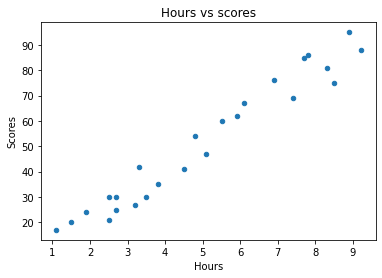

In [5]:
scores.plot(kind='scatter',x='Hours',y='Scores',title='Hours vs scores',style='o')
scores.corr()

In [6]:
scores.shape

(25, 2)

In [7]:
#dividing the data into "attributes" (inputs) and "labels" (outputs)
X= scores.iloc[:, :-1].values  # independent variable
y= scores.iloc[:, 1].values # dependent variable
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [8]:
#splitting  our data into training and testing set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [9]:
#importing linear regression function
from sklearn import linear_model
#creating linear regression object
lm =linear_model.LinearRegression()

In [10]:
#Training the model using the training sets
lm.fit(X_train,y_train)
print ("Intercept:",lm.intercept_)
print ("Coefficient: ",lm.coef_)

Intercept: 2.018160041434683
Coefficient:  [9.91065648]


In [11]:
#the score of the model
lm.score(X_train,y_train)

0.9515510725211552

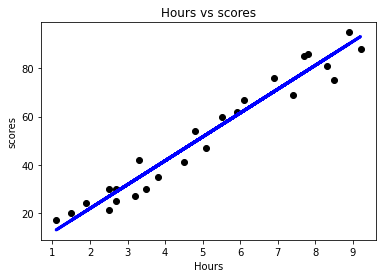

In [12]:
#plotting fitted(regression)line
plt.scatter(X,y,color='black')
line = lm.coef_*X+lm.intercept_
plt.plot(X,line,color="blue",linewidth=3)
plt.title('Hours vs scores')
plt.ylabel('scores')
plt.xlabel('Hours')
plt.show()

In [13]:
#Making predictions

print(X_test)
y_pred = lm.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Evaluating the Model

In [14]:
# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
# add predict value to the data frame
scores['score_Pred'] = lm.predict(X)
# Using built-in function
print ("R Squared using built-in function: ", r2_score(scores.Scores, y))
print ("Mean Absolute Error: ", mean_absolute_error(scores.Scores, scores.score_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(scores.Scores, scores.score_Pred)))


R Squared using built-in function:  1.0
Mean Absolute Error:  4.986053347144891
Root Mean Squared Error:  5.388719677557471


R-squared can be interpreted as 100% of variablility in the dependent variable (score) can be explained by the independent variable (hours studied)

Root Mean Squared Error (RMSE)
This is the square root of the mean of the squared errors. RMSE indicates how close the 
predicted values are to the actual values; hence a lower RMSE value signifies that the 
model performance is good. One of the key properties of RMSE is that the unit will be the 
same as the target variable.

Mean Absolute Error
This is the mean or average of absolute value of the errors, that is, the predicted - actual.

# Prediction

In [15]:
#What is the predicted score for 9.25hours
hours = 9.25

mypred= lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(mypred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
